<a href="https://colab.research.google.com/github/lisaong/data/blob/master/demos/Ninja_Cat_GEMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Multiplication Example

* A matrix: A compressed version of an image
* B matrix: The principal components
* C matrix: The recovered (decompressed) version of the image


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA

In [13]:
!curl -L -O https://github.com/lisaong/data/raw/master/demos/test.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   134  100   134    0     0    978      0 --:--:-- --:--:-- --:--:--   978
100  492k  100  492k    0     0  1858k      0 --:--:-- --:--:-- --:--:-- 1858k


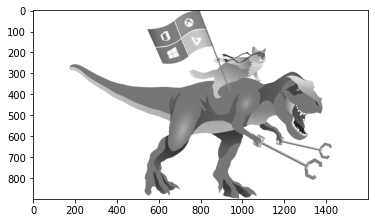

In [16]:
image = cv2.imread('test.png')

# Convert to grayscale as we only need a 2-D matrix for this example
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

In [17]:
gray.shape

(900, 1600)

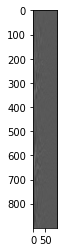

In [19]:
# Compress the image to 900x100, as an example
pca = PCA(n_components=100)

gray_reduced = pca.fit_transform(gray)

gray_reduced.shape

plt.imshow(gray_reduced, cmap='gray');

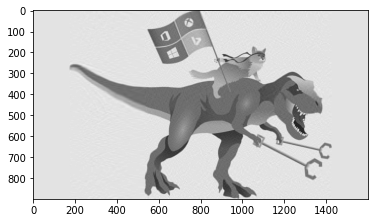

In [22]:
# This is reversible (we are ignoring the whitening part, 
# since we are just demonstrating a matrix multiplication)
reversed = pca.inverse_transform(gray_reduced)

plt.imshow(reversed, cmap='gray');

In [24]:
gray_reduced.shape # this will be our A matrix

(900, 100)

In [23]:
pca.components_.shape # this will be our B matrix

(100, 1600)

Let's try reconstructing the image using numpy matrix multiplication (`numpy.dot`).

Later on, RoboCode's GEMM function will replace the `numpy.dot`.


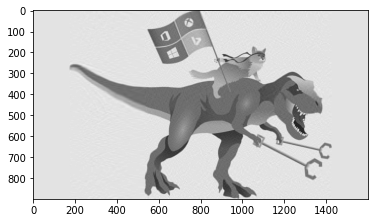

In [40]:
manual_reconstruction = np.dot(gray_reduced, pca.components_)

plt.imshow(manual_reconstruction + pca.mean_, cmap='gray');

## Save the matrices

Save the A and B matrices to CSV format, that will then be loaded into our runner function for RoboCode, to get the C matrix as result.

In [27]:
gray_reduced # the values of the A matrix

array([[-1401.83399423,   550.27308994,  -399.32617945, ...,
           23.98864713,   -49.73569231,   -23.62845104],
       [-1387.50422782,   559.85897423,  -422.8246012 , ...,
           24.29503573,   -39.09252304,   -23.19299841],
       [-1342.74280782,   588.18596084,  -496.54337424, ...,
           30.64472929,    -7.33688733,    -2.03144472],
       ...,
       [-1384.67385996,   564.61888696,  -345.9569688 , ...,
           25.86797986,   -41.81396258,   -10.7504827 ],
       [-1395.04425414,   557.00137278,  -362.51730594, ...,
           29.85379474,   -48.76626901,   -16.36863251],
       [-1403.44004334,   550.15119714,  -375.92927372, ...,
           25.69935232,   -50.62520067,   -21.32305574]])

In [28]:
np.savetxt('A_matrix.csv', gray_reduced, delimiter=',')

In [29]:
pca.components_ # the values of the B matrix

array([[-6.70273020e-20,  2.33592388e-20, -6.70143266e-22, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.43546282e-17,  5.70673783e-18, -2.21313245e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.04034010e-17, -9.41160150e-17, -5.50701016e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 2.27890259e-15, -6.82274372e-15,  2.29690523e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.84866108e-15,  9.70011358e-16, -1.29894343e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.93007598e-14,  2.80845277e-15,  7.95177953e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [30]:
np.savetxt('B_matrix.csv', pca.components_, delimiter=',')

## Back to RoboCode...

1. Download the `A_matrix.csv` and `B_matrix.csv` files.

2. We'll use RoboCode's emitted GEMM function to produce `C_matrix_robocode.csv`.

## Back from RoboCode... (Verification)

After we've generated `C_matrix_robocode.csv`, let's verify RoboCode's GEMM function for correctness. 

Before running the code below, upload your `C_matrix_robocode.csv` file to the same location as this notebook.

In [34]:
C_matrix_robocode = np.loadtxt('C_matrix_robocode.csv', delimiter=',')

C_matrix_robocode.shape

(900, 1600)

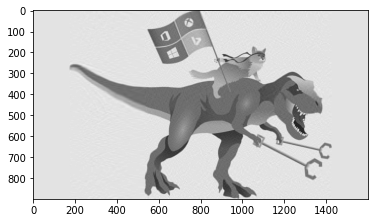

In [36]:
plt.imshow(C_matrix_robocode + pca.mean_, cmap='gray');

Visually, the results look similar. But we can check programmatically.

In [57]:
A_matrix_load = np.loadtxt('A_matrix.csv', delimiter=',')
B_matrix_load = np.loadtxt('B_matrix.csv', delimiter=',')
C_matrix_numpy = np.dot(A_matrix_load, B_matrix_load)

np.testing.assert_allclose(C_matrix_robocode, C_matrix_numpy, atol=1e-3)